# Fortune 500 HQs and Impact on Local Economies

In [405]:
#dependencies
import pandas as pd
import csv
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from config import g_key
import geocoder

In [406]:
#importing fortune 500 HQs
fortune500HQ_to_load = "./Data_Files/Fortune_500.csv"
Fortune_500 = pd.read_csv(fortune500HQ_to_load)

Fortune_500.head()

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0


In [407]:
counties = []

for row in range(0, len(Fortune_500)):
    city = Fortune_500["Hqcity"][row]
    state = Fortune_500["Hqstate"][row]
    results = geocoder.google(f"{city}, {state}", key=g_key)
    
    # Use conditional to set county equal to city name if no county is available
    if type(results.county) != str:
        counties.append(f"{city} city, {state}")
    elif results.county == "Queens County":
        counties.append("New York city, NY")
    elif results.county == "District of Columbia":
        counties.append("District of Columbia")
    else:
        counties.append(f"{results.county}, {state}")
        
# Add County Column
Fortune_500["County"] = counties
Fortune_500.head()

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,County
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0,"Benton County, AR"
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0,"Douglas County, NE"
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0,"Santa Clara County, CA"
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0,"Dallas County, TX"
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,"1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0,"San Francisco County, CA"


In [408]:
# Create empty list to store zip codes
zip_codes = []

# Loop through dataframe, splitting Address column into strings extracting zip at final index
for row in range(0, len(Fortune_500)):
    address_split = Fortune_500["Address"][row].split()
    zip_codes.append(address_split[-1])
    
# Add zip code column
Fortune_500["Zip Code"] = zip_codes
Fortune_500.head()

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,County,Zip Code
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0,"Benton County, AR",72716
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0,"Douglas County, NE",68131
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0,"Santa Clara County, CA",95014
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0,"Dallas County, TX",75039
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0,"San Francisco County, CA",94104


In [409]:
# Remove unnecessary columns
Fortune_500 = Fortune_500[["Rank", "Title", "Sector", "Industry", "Hqcity", "Hqstate", "County", "Zip Code", "Revenues", "Profits", "Prftchange"]]

# Rename columns
Fortune_500 = Fortune_500.rename(index=str, columns={"Hqcity": "City", "Hqstate": "State", "Prftchange": "Change in Profits"})

Fortune_500.head()

,Rank,Title,Sector,Industry,City,State,County,Zip Code,Revenues,Profits,Change in Profits
0,1,Walmart,Retailing,General Merchandisers,Bentonville,AR,"Benton County, AR",72716,485873,13643.0,-7.2
1,2,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),Omaha,NE,"Douglas County, NE",68131,223604,24074.0,0
2,3,Apple,Technology,"Computers, Office Equipment",Cupertino,CA,"Santa Clara County, CA",95014,215639,45687.0,-14.4
3,4,Exxon Mobil,Energy,Petroleum Refining,Irving,TX,"Dallas County, TX",75039,205004,7840.0,-51.5
4,5,McKesson,Wholesalers,Wholesalers: Health Care,San Francisco,CA,"San Francisco County, CA",94104,192487,2258.0,53


# Unemployment

In [416]:
# Read unemployment csv into a dataframe
unemployment_file = pd.read_csv("./Data_Files/unemployment.csv", header=None, encoding="iso-8859-1")
unemployment_file.head(20)

,0,1,2,3,4,5,6,7,8
0,"Labor force data by county, not seasonally adj...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,State,County,NaN,NaN,NaN,NaN,NaN,Unemploy-
3,NaN,FIPS,FIPS,NaN,NaN,Labor,NaN,NaN,ment Rate
4,LAUS Code,Code,Code,County Name/State Abbreviation,Period,Force,Employed,Unemployed,(%)
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CN0100100000000,01,001,"Autauga County, AL",Nov-17,"25,871","25,085",786,3.0
7,CN0100300000000,01,003,"Baldwin County, AL",Nov-17,"90,382","87,439","2,943",3.3
8,CN0100500000000,01,005,"Barbour County, AL",Nov-17,"8,148","7,766",382,4.7
9,CN0100700000000,01,007,"Bibb County, AL",Nov-17,"8,455","8,177",278,3.3


In [417]:
# Rename columns
unemployment_df = unemployment_file.rename(columns={0: "County Code", 1: "State FIPS", 2: "County FIPS", 
                                  3: "County_State", 4: "Month", 5: "Labor Force", 6: "Employed", 
                                  7: "Unemployed", 8: "Unemployment Rate (%)"})

unemployment_df.head()

,County Code,State FIPS,County FIPS,County_State,Month,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,"Labor force data by county, not seasonally adj...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,State,County,NaN,NaN,NaN,NaN,NaN,Unemploy-
3,NaN,FIPS,FIPS,NaN,NaN,Labor,NaN,NaN,ment Rate
4,LAUS Code,Code,Code,County Name/State Abbreviation,Period,Force,Employed,Unemployed,(%)


In [418]:
# Remove extra rows that were included from csv formatting
unemployment_df=unemployment_df.drop(unemployment_df.index[:6])
unemployment_df.head()

,County Code,State FIPS,County FIPS,County_State,Month,Labor Force,Employed,Unemployed,Unemployment Rate (%)
6,CN0100100000000,01,001,"Autauga County, AL",Nov-17,"25,871","25,085",786,3.0
7,CN0100300000000,01,003,"Baldwin County, AL",Nov-17,"90,382","87,439","2,943",3.3
8,CN0100500000000,01,005,"Barbour County, AL",Nov-17,"8,148","7,766",382,4.7
9,CN0100700000000,01,007,"Bibb County, AL",Nov-17,"8,455","8,177",278,3.3
10,CN0100900000000,01,009,"Blount County, AL",Nov-17,"24,396","23,641",755,3.1


In [419]:
# Use .loc to find unemployment rate at the end of the year
unemployment_df = unemployment_df.loc[unemployment_df["Month"] == "Dec-17"]

# Reset index values
unemployment_df = unemployment_df.reset_index(drop=True)

unemployment_df.head()

,County Code,State FIPS,County FIPS,County_State,Month,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,CN0100100000000,01,001,"Autauga County, AL",Dec-17,"25,733","24,952",781,3.0
1,CN0100300000000,01,003,"Baldwin County, AL",Dec-17,"90,001","87,006","2,995",3.3
2,CN0100500000000,01,005,"Barbour County, AL",Dec-17,"8,074","7,704",370,4.6
3,CN0100700000000,01,007,"Bibb County, AL",Dec-17,"8,412","8,143",269,3.2
4,CN0100900000000,01,009,"Blount County, AL",Dec-17,"24,164","23,434",730,3.0


In [420]:
# All columns are strings with hidden white space.

# Show original data types
print(unemployment_df.dtypes)

# Loop through rows of numerical columns to strip white space and remove commas
for row in range(0, len(unemployment_df)):
    string = unemployment_df["Labor Force"][row]
    unemployment_df["Labor Force"][row] = string.strip()
    unemployment_df["Labor Force"][row] = string.replace(",","")
    
    string = unemployment_df["Employed"][row]
    unemployment_df["Employed"][row] = string.strip()
    unemployment_df["Employed"][row] = string.replace(",","")
    
    string = unemployment_df["Unemployed"][row]
    unemployment_df["Unemployed"][row] = string.strip()
    unemployment_df["Unemployed"][row] = string.replace(",","")
    
    string = unemployment_df["Unemployment Rate (%)"][row]
    unemployment_df["Unemployment Rate (%)"][row] = string.strip()
    
# Convert numerical string values to integers
unemployment_df["Labor Force"] = unemployment_df["Labor Force"].astype(int)
unemployment_df["Employed"] = unemployment_df["Employed"].astype(int)
unemployment_df["Unemployed"] = unemployment_df["Unemployed"].astype(int)
unemployment_df["Unemployment Rate (%)"] = unemployment_df["Unemployment Rate (%)"].astype(float)

# Show new data types
unemployment_df.dtypes

County Code              object
State FIPS               object
County FIPS              object
County_State             object
Month                    object
Labor Force              object
Employed                 object
Unemployed               object
Unemployment Rate (%)    object
dtype: object


County Code               object
State FIPS                object
County FIPS               object
County_State              object
Month                     object
Labor Force                int32
Employed                   int32
Unemployed                 int32
Unemployment Rate (%)    float64
dtype: object

In [421]:
# County and State must be split to clean dataframe

# Create empty list variables to store split values
unemployment_counties = []
unemployment_states = []

# Loop through df to split County_State column into County and State
for row in range(0, len(unemployment_df)):
    county_split = unemployment_df["County_State"][row].split(",")
    county_split[0].strip()
    county_split[-1].strip()
    unemployment_counties.append(county_split[0])
    unemployment_states.append(county_split[-1])
    
# Add columns to df
unemployment_df["County"] = unemployment_counties
unemployment_df["State"] = unemployment_states

# Rearrange columns and remove unnecessary columns
unemployment_df = unemployment_df[["County", "State", "Labor Force", "Employed", 
                                   "Unemployed", "Unemployment Rate (%)"]]

# Drop Puerto Rico from dataframe
unemployment_df = unemployment_df.loc[unemployment_df["State"] != " PR"]

unemployment_df.head()

,County,State,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,Autauga County,AL,25733,24952,781,3.0
1,Baldwin County,AL,90001,87006,2995,3.3
2,Barbour County,AL,8074,7704,370,4.6
3,Bibb County,AL,8412,8143,269,3.2
4,Blount County,AL,24164,23434,730,3.0


In [223]:
# New York City is split into 5 counties for each borough and must be combined into one entry

# Isolate New York Counties from the rest of the df
nyc_df = unemployment_df.loc[unemployment_df["State"] == " NY"]

# Rename each county to New York City
nyc_df.loc[nyc_df["County"] == "New York County", "County"] = "New York city"
nyc_df.loc[nyc_df["County"] == "Kings County", "County"] = "New York city"
nyc_df.loc[nyc_df["County"] == "Bronx County", "County"] = "New York city"
nyc_df.loc[nyc_df["County"] == "Richmond County", "County"] = "New York city"
nyc_df.loc[nyc_df["County"] == "Queens County", "County"] = "New York city"

# Combine all New York City data into one dataframe
nyc_df = nyc_df.loc[nyc_df["County"] == "New York city"]

# Find totals of statistics and find unemployment rate for all 5 boroughs
nyc_labor_force = nyc_df["Labor Force"].sum()
nyc_employed = nyc_df["Employed"].sum()
nyc_unemployed = nyc_df["Unemployed"].sum()
nyc_unemployment_rate = round(nyc_unemployed / nyc_labor_force * 100, 1)

# Make a dataframe using NYC totals
nyc_totals = pd.DataFrame({"County": "New York city", "State": "NY", "Labor Force": nyc_labor_force, 
                           "Employed": nyc_employed, "Unemployed": nyc_unemployed,
                           "Unemployment Rate (%)": nyc_unemployment_rate}, index=[0])

# Drop NYC rows from unemployment dataframe
unemployment_df[unemployment_df.County != "New York city"]

# Merge NYC totals into main dataframe to replace dropped rows
unemployment_df = unemployment_df.merge(nyc_totals, how="outer")
unemployment_df.head()

,County,State,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,Autauga County,AL,25733,24952,781,3.0
1,Baldwin County,AL,90001,87006,2995,3.3
2,Barbour County,AL,8074,7704,370,4.6
3,Bibb County,AL,8412,8143,269,3.2
4,Blount County,AL,24164,23434,730,3.0


In [224]:
unemployment_df.loc[unemployment_df["County"] == "New York city"]

,County,State,Labor Force,Employed,Unemployed,Unemployment Rate (%)
3141,New York city,NY,4189864,4023962,165902,4.0


In [422]:
# Place county and state back in to one column

# Empty list to store values
county_state = []

# Create conditional to combine county & state, accounting for exceptions caused by mismatch w/ Fortune 500 County
for row in range(0, len(unemployment_df)):
    
    # To fix New York appearing as New York city,NY (no space after comma)
    if unemployment_df["County"][row] == "New York city":
        county_state.append(unemployment_df["County"][row] + ", " + unemployment_df["State"][row])
    
    # To fix DC appearing as District of Columbia, District of Columbia
    elif unemployment_df["County"][row] == "District of Columbia":
        county_state.append("District of Columbia")
    
    # To fix capitalization on Dupage County, IL
    elif unemployment_df["County"][row] == "DuPage County":
        county_state.append("Dupage County, IL")
    
    # To fix St Louis County, MO (removed period after St.)
    # Included state in conditional so nothing happens to St. Louis County, MN
    elif unemployment_df["County"][row] == "St. Louis County" and unemployment_df["State"][row] == " MO":
        county_state.append("St Louis County, MO")
    
    # Combine county and state for counties that meet none of the above conditions
    else:
        county_state.append(unemployment_df["County"][row] + "," + unemployment_df["State"][row])

# Add County & State column to DataFrame
unemployment_df["County & State"] = county_state

# Rearrange columns and remove redundant County, State columns
unemployment_df = unemployment_df[["County & State", "Labor Force", 
                                   "Employed", "Unemployed", "Unemployment Rate (%)"]]

# Rename County & State to County
unemployment_df = unemployment_df.rename(columns={"County & State": "County"})

unemployment_df.head()

,County,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,"Autauga County, AL",25733,24952,781,3.0
1,"Baldwin County, AL",90001,87006,2995,3.3
2,"Barbour County, AL",8074,7704,370,4.6
3,"Bibb County, AL",8412,8143,269,3.2
4,"Blount County, AL",24164,23434,730,3.0


In [423]:
# Run another loop to fix some counties named "<Name> County/city"
for row in range(0, len(unemployment_df)):
    
    # Set string variable for each iteration to use string method
    string = unemployment_df["County"][row]
    
    # Conditional is County column includes the string "County/city"
    if "County/city" in string:
        
        # Replace "County/city" with "County"
        unemployment_df["County"][row] = string.replace("County/city", "County")
    
unemployment_df.head()

C:\Users\ericr\Anaconda3\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,County,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,"Autauga County, AL",25733,24952,781,3.0
1,"Baldwin County, AL",90001,87006,2995,3.3
2,"Barbour County, AL",8074,7704,370,4.6
3,"Bibb County, AL",8412,8143,269,3.2
4,"Blount County, AL",24164,23434,730,3.0


In [424]:
# Merge Fortune 500 df with unemployment df to show county labor data for each company
fortune_merge = pd.merge(Fortune_500, unemployment_df, on="County", how="inner")

# Rearrange columns to move relevant data to the left side
fortune_merge = fortune_merge[["Rank", "Title", "County", "Labor Force", "Employed", "Unemployed", 
                               "Unemployment Rate (%)", "Sector", "Industry", "Revenues", 
                               "Profits", "Change in Profits", "Zip Code"]]

# Rename columns to clarify data
fortune_merge = fortune_merge.rename(columns={"Labor Force": "County Labor Force", "Employed": "County Employed", 
                                              "Unemployed": "County Unemployed", 
                                              "Unemployment Rate (%)": "County Unemployment Rate (%)"})

# Sort by company ranking and reset index
fortune_merge = fortune_merge.sort_values(["Rank"])
fortune_merge = fortune_merge.reset_index(drop=True)

fortune_merge.head()

,Rank,Title,County,County Labor Force,County Employed,County Unemployed,County Unemployment Rate (%),Sector,Industry,Revenues,Profits,Change in Profits,Zip Code
0,1,Walmart,"Benton County, AR",131452,127614,3838,2.9,Retailing,General Merchandisers,485873,13643.0,-7.2,72716
1,2,Berkshire Hathaway,"Douglas County, NE",288668,279996,8672,3.0,Financials,Insurance: Property and Casualty (Stock),223604,24074.0,0,68131
2,3,Apple,"Santa Clara County, CA",1048528,1020719,27809,2.7,Technology,"Computers, Office Equipment",215639,45687.0,-14.4,95014
3,4,Exxon Mobil,"Dallas County, TX",1346137,1301231,44906,3.3,Energy,Petroleum Refining,205004,7840.0,-51.5,75039
4,5,McKesson,"San Francisco County, CA",571462,557616,13846,2.4,Wholesalers,Wholesalers: Health Care,192487,2258.0,53,94104
5,6,UnitedHealth Group,"Hennepin County, MN",694993,676227,18766,2.7,Health Care,Health Care: Insurance and Managed Care,184840,7017.0,20.7,55343
6,7,CVS Health,"Providence County, RI",325072,310691,14381,4.4,Health Care,Health Care: Pharmacy and Other Services,177526,5317.0,1.5,02895
7,8,General Motors,"Wayne County, MI",788952,750189,38763,4.9,Motor Vehicles & Parts,Motor Vehicles and Parts,166380,9427.0,-2.7,48265
8,9,AT&T,"Dallas County, TX",1346137,1301231,44906,3.3,Telecommunications,Telecommunications,163786,12976.0,-2.8,75202
9,10,Ford Motor,"Wayne County, MI",788952,750189,38763,4.9,Motor Vehicles & Parts,Motor Vehicles and Parts,151800,4596.0,-37.7,48126


In [425]:
# Merge again, reversing order to show data for counties WITHOUT a Fortune 500 headquarters
unemployment_merge = pd.merge(unemployment_df, Fortune_500, on="County", how="outer")

# Loop through merged df to find counties with a company hq
for row in range(0, len(unemployment_merge)):
    
    # Title column is either a string or a NaN value
    if type(unemployment_merge["Title"][row]) == str:
        
        # Change all non-Nan values to an identical value that can be removed based on .loc conditional
        unemployment_merge["Title"][row] = "REMOVE"
        
# Use .loc to remove the rows with changed company names
unemployment_merge = unemployment_merge.loc[unemployment_merge["Title"] != "REMOVE"]

unemployment_merge.head()

C:\Users\ericr\Anaconda3\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,County,Labor Force,Employed,Unemployed,Unemployment Rate (%),Rank,Title,Sector,Industry,City,State,Zip Code,Revenues,Profits,Change in Profits
0,"Autauga County, AL",25733.0,24952.0,781.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Baldwin County, AL",90001.0,87006.0,2995.0,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Barbour County, AL",8074.0,7704.0,370.0,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Bibb County, AL",8412.0,8143.0,269.0,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Blount County, AL",24164.0,23434.0,730.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
# drop columns that contain NaN values
unemployment_merge = unemployment_merge.dropna(axis="columns")
unemployment_merge.head()

,County,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,"Autauga County, AL",25733,24952,781,3.0
1,"Baldwin County, AL",90001,87006,2995,3.3
2,"Barbour County, AL",8074,7704,370,4.6
3,"Bibb County, AL",8412,8143,269,3.2
4,"Blount County, AL",24164,23434,730,3.0


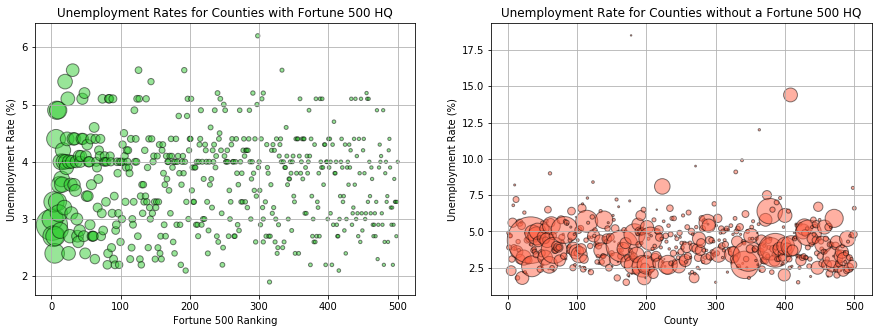

In [404]:
# Create a new df based on a random sample of the non-Fortune 500 counties
unemployment_sample = unemployment_merge.sample(500)

# Set x and y axis values for Fortune 500 plot
x_fortune = fortune_merge["Rank"]
y_fortune = fortune_merge["County Unemployment Rate (%)"]

# Set size of scatter points to correspond to total labor force
#s = [x for x in range(0, len(fortune_merge["Revenues"]))]
s_fortune = fortune_merge["Revenues"] * .002
s_non_fortune = unemployment_sample["Labor Force"] * .002

ax1 = plt.subplot(121)
plt.scatter(x_fortune, y_fortune, s=s_fortune, c="limegreen", alpha=0.5, edgecolors="black")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Fortune 500 Ranking")
plt.title("Unemployment Rates for Counties with Fortune 500 HQ")
plt.grid()

ax2 = plt.subplot(122)
plt.scatter(list(range(1, 501)), unemployment_sample["Unemployment Rate (%)"], s=s_non_fortune, 
            c="tomato", alpha=0.5, edgecolors="black")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("County")
plt.title("Unemployment Rate for Counties without a Fortune 500 HQ")

plt.rcParams["figure.figsize"] = (15, 5)

plt.grid()
plt.show()

In [403]:
# Geocoder Test Cell #

results = geocoder.google("5050 Brunson Drive, Coral Gables, FL", key=g_key)
print(results.county)
print(results.city)
print(results.country)
print(results.state)
print(results.state_long)
print(results.postal)
print(results.latlng)


Miami-Dade County
Coral Gables
US
FL
Florida
33124
[25.7229821, -80.2763453]
